In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the emotion recognition model
emotion_identifier = tf.keras.models.load_model('emotion_identifier_model_2.h5')

# Load the Haarcascade classifier for face detection
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [3]:
# Define a function to process an image and make predictions
def process_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    for x, y, w, h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        facess = faceCascade.detectMultiScale(roi_gray)
        
        if len(facess) == 0:
            print("Face not Detected in", image_path)
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey:ey+eh, ex:ex+ew]
                
            final_1 = cv2.resize(face_roi, (224, 224))
            final_2 = np.expand_dims(final_1, axis=0)
            final_3 = final_2 / 255.0
            
            predict = emotion_identifier.predict(final_3)
            predicted_class = np.argmax(predict)
            
            plt.figure()
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f"Predicted Emotion: {predicted_class}")
            plt.show()

In [4]:
# Path to the folder containing images for testing
test_folder = "test_images/augmented"

1/1 [==============================] - 1s 741ms/step


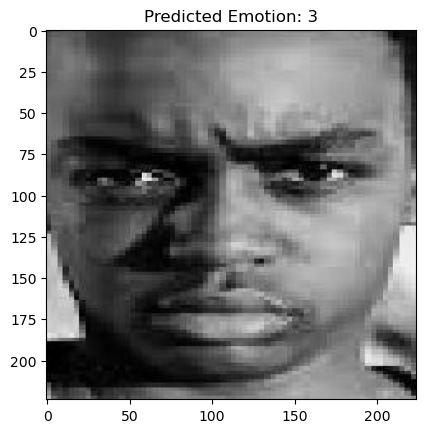

1/1 [==============================] - 0s 30ms/step


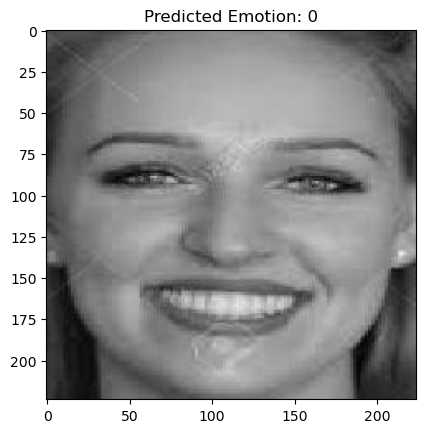

Face not Detected in test_images/augmented\7056425327_e9e2d4f40a_b_face.jpg
Face not Detected in test_images/augmented\7647334524_7fe96ff1f0_n_face.jpg
1/1 [==============================] - 0s 16ms/step


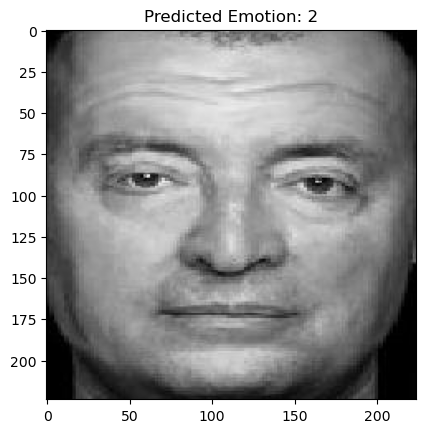

1/1 [==============================] - 0s 16ms/step


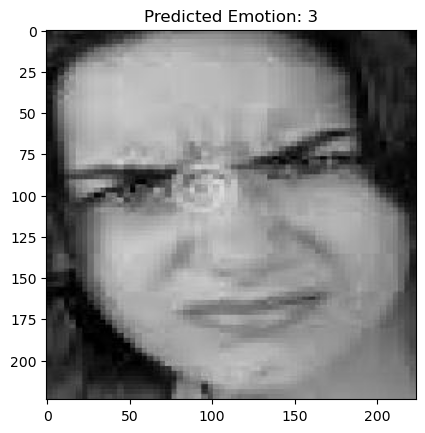

Face not Detected in test_images/augmented\9k__face.jpg
1/1 [==============================] - 0s 16ms/step


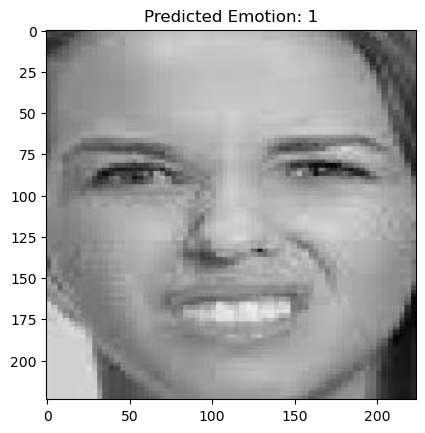

1/1 [==============================] - 0s 28ms/step


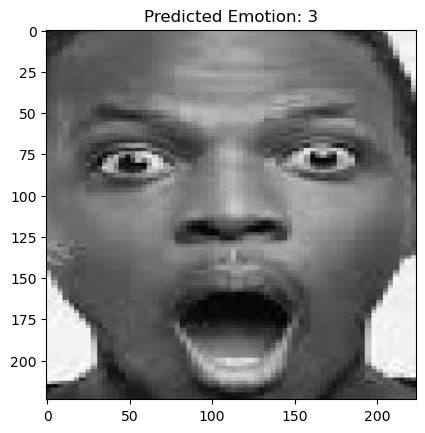

In [5]:
image_files = [f for f in os.listdir(test_folder) if f.endswith('.jpg')]

# Process and make predictions for each image
for image_file in image_files:
    image_path = os.path.join(test_folder, image_file)
    process_image(image_path)